In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thresholds

In [2]:
df = pd.read_csv('SA_v7_thr.csv')
print(len(df))
print(df['rating'].value_counts())

5366
5    2449
3    2009
4     426
1     340
2     142
Name: rating, dtype: int64


In [3]:
rating = []
mean = []

for i in range(5):
    r = -i+5
    m = format((df[df.rating == -i+5].probability.mean()), '.2%')
    
    rating.append(r)
    mean.append(m)
    
pd.DataFrame({'Rating': rating,
              'Mean': mean})

,Rating,Mean
0,5,99.91%
1,4,99.87%
2,3,99.41%
3,2,99.59%
4,1,99.64%


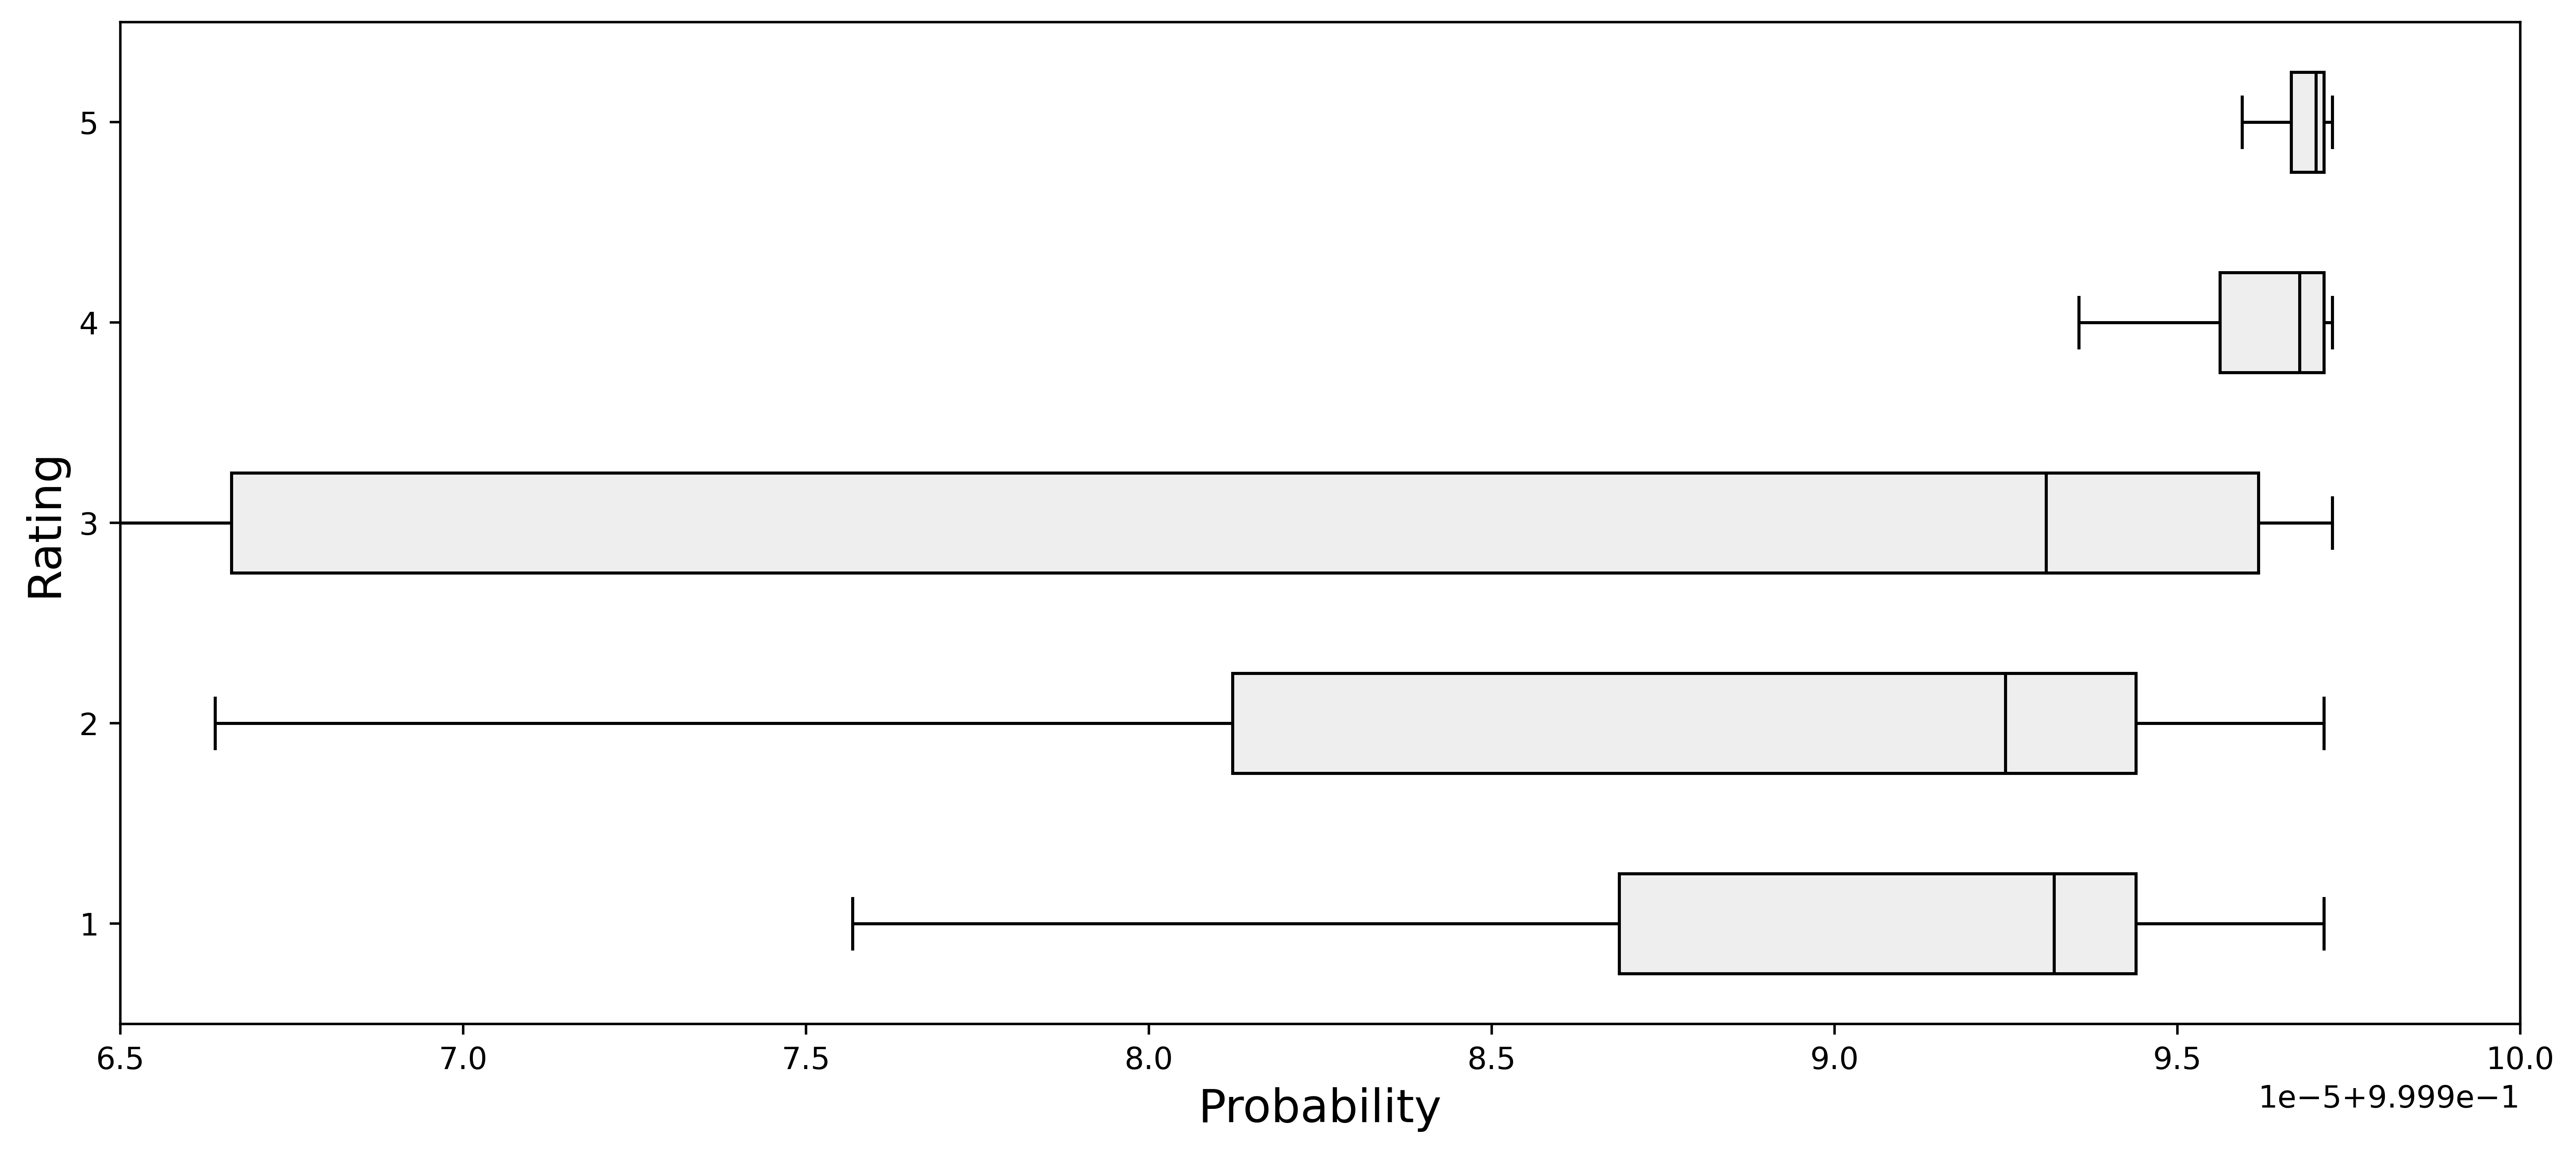

Positve  Threshold:
99.9994%
Negative Threshold:
99.9966%


In [4]:
c1 = df.loc[df['rating'] == 1, 'probability'].values
c2 = df.loc[df['rating'] == 2, 'probability'].values
c3 = df.loc[df['rating'] == 3, 'probability'].values
c4 = df.loc[df['rating'] == 4, 'probability'].values
c5 = df.loc[df['rating'] == 5, 'probability'].values

plt.figure(figsize = (14, 6), dpi = 500)
plt.xlim(0.999965, 1)

box = plt.boxplot([c1, c2, c3, c4, c5],
                  labels = ['1', '2', '3', '4', '5'],
                  vert = False,
                  showfliers = False,
                  patch_artist = True,
                  medianprops = dict(color = 'black'))

colors = ['#EEEEEE', '#EEEEEE', '#EEEEEE', '#EEEEEE', '#EEEEEE']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Probability', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.show()

print('Positve  Threshold:')
print(format([item.get_xdata() for item in box['whiskers']][6][1], '.4%'))
print('Negative Threshold:')
print(format([item.get_xdata() for item in box['whiskers']][2][1], '.4%'))

In [31]:
print(len(df[(df['rating'] == 3) & (df['sentiment'] == 'positive') & (df['probability'] <= 0.999994)]))
print(len(df[(df['rating'] == 3) & (df['sentiment'] == 'negative') & (df['probability'] <= 0.999966)]))
print(len(df[(df['rating'] == 3) & (df['sentiment'] == 'positive')])) 
print(len(df[(df['rating'] == 3) & (df['sentiment'] == 'negative')]))
(443+295)/(1157+852)

433
295
1157
852


0.3673469387755102

# Filtering

In [5]:
# pd.set_option('display.max_colwidth', None)

In [6]:
df_rs = pd.read_csv('SA_results_v7.csv')
print(len(df_rs))
df_rs[['sentence', 'sentiment', 'probability']].head()

225978


,sentence,sentiment,probability
0,when ordering i was unsure if the holder would...,positive,0.999995
1,miss leading add it's not useful\nfor anything,negative,0.999989
2,very adaptable to all different location mounts.,positive,0.999997
3,i thought it was a speaker but it's just a lit...,negative,0.999994
4,"great product, great service.",positive,0.999997


In [7]:
df_rs_p = df_rs[df_rs['sentiment'] == 'positive']
df_rs_n = df_rs[df_rs['sentiment'] == 'negative']

print(len(df_rs_p))
print(len(df_rs_n))

186158
39820


In [8]:
df_rs_p2 = df_rs_p[df_rs_p['probability'] >= 0.999994]
df_rs_n2 = df_rs_n[df_rs_n['probability'] >= 0.999966]

df_rs_p3 = df_rs_p2[['sentence', 'sentiment', 'probability']]
df_rs_n3 = df_rs_n2[['sentence', 'sentiment', 'probability']]

print(len(df_rs_p3))
print(len(df_rs_n3))
print('')
print(len(df_rs_p) - len(df_rs_p3))
print(len(df_rs_n)- len(df_rs_n3))

151024
27176

35134
12644


In [9]:
print(df_rs_p3.probability.max())
print(df_rs_n3.probability.max())

0.9999972582
0.9999953508


In [10]:
df_rs_p3['strength'] = (df_rs_p3['probability'] - 0.999994) / (df_rs_p3.probability.max() - 0.999994)
print(df_rs_p3.probability.max())

df_rs_p4 = df_rs_p3[['sentence', 'sentiment', 'strength']]
df_rs_p4.head(3)

0.9999972582


,sentence,sentiment,strength
0,when ordering i was unsure if the holder would...,positive,0.451169
2,very adaptable to all different location mounts.,positive,0.890246
4,"great product, great service.",positive,1.000000


In [11]:
df_rs_n3['strength'] = (df_rs_n3['probability'] - 0.999966) / (df_rs_n3.probability.max() - 0.999966)
print(df_rs_n3.probability.max())

df_rs_n4 = df_rs_n3[['sentence', 'sentiment', 'strength']]
df_rs_n4.head(3)

0.9999953508


,sentence,sentiment,strength
1,miss leading add it's not useful\nfor anything,negative,0.788803
3,i thought it was a speaker but it's just a lit...,negative,0.963449
7,"love the size and good bass quality, but it do...",negative,0.886279


In [12]:
df_rs_p4.append(df_rs_n4).sort_index().head()

,sentence,sentiment,strength
0,when ordering i was unsure if the holder would...,positive,0.451169
1,miss leading add it's not useful\nfor anything,negative,0.788803
2,very adaptable to all different location mounts.,positive,0.890246
3,i thought it was a speaker but it's just a lit...,negative,0.963449
4,"great product, great service.",positive,1.000000


In [13]:
#df_rs_p4.to_csv('SA_results_v7_p.csv')
#df_rs_n4.to_csv('SA_results_v7_n.csv')